<a href="https://colab.research.google.com/github/maoki109/CancerDeathRate/blob/main/Assignment_3_Notebook_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mari Aoki

DPhi Machine Learning Bootcamp - Beginner

Due: December 23, 2020 10:30 am

## Datathon-2: Notebook Submission
This is a template for Assignment 3 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

https://dphi.tech/practice/challenge/52

## Problem Statement

Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

## Objective

You are required to build a machine learning  model that would predict the cancer death rate for the given year.

## Task 1

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# data visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
# To split the dataset into train and test set
from sklearn.model_selection import train_test_split  

# Linear regression model
from sklearn.linear_model import LinearRegression

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Decsion Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# for model evaluation
from sklearn.metrics import f1_score  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics  

# Accuracy score
from sklearn.metrics import accuracy_score

### Load the data and display first 5 rows.

In [ ]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [ ]:
cancer_data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   MedianAge                3051 non-null   float64
 8   MedianAgeMale            3051 non-null   float64
 9   MedianAgeFemale          3051 non-null   float64
 10  AvgHouseholdSize         3051 non-null   float64
 11  PercentMarried           3051 non-null   float64
 12  PctNoHS18_24             3051 non-null   float64
 13  PctHS18_24               3051 non-null   float64
 14  PctSomeCol18_24         

Look for and remove extra duplicates.

In [ ]:
cancer_data.duplicated().sum()

766

In [ ]:
cancer_data.drop_duplicates(keep='first', inplace=True)

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2285 non-null   float64
 1   avgDeathsPerYear         2285 non-null   int64  
 2   incidenceRate            2285 non-null   float64
 3   medIncome                2285 non-null   int64  
 4   popEst2015               2285 non-null   int64  
 5   povertyPercent           2285 non-null   float64
 6   studyPerCap              2285 non-null   float64
 7   MedianAge                2285 non-null   float64
 8   MedianAgeMale            2285 non-null   float64
 9   MedianAgeFemale          2285 non-null   float64
 10  AvgHouseholdSize         2285 non-null   float64
 11  PercentMarried           2285 non-null   float64
 12  PctNoHS18_24             2285 non-null   float64
 13  PctHS18_24               2285 non-null   float64
 14  PctSomeCol18_24         

In [ ]:
cancer_data['binnedInc']

0       (48021.6, 51046.4]
1       (54545.6, 61494.5]
2       (37413.8, 40362.7]
3         [22640, 34218.1]
4       (37413.8, 40362.7]
               ...        
3046    (34218.1, 37413.8]
3047    (37413.8, 40362.7]
3048    (51046.4, 54545.6]
3049    (40362.7, 42724.4]
3050      [22640, 34218.1]
Name: binnedInc, Length: 3051, dtype: object

In [ ]:
cancer_data['Geography']

0       Hettinger County, North Dakota
1                   Mills County, Iowa
2             Gladwin County, Michigan
3           Fentress County, Tennessee
4          Las Animas County, Colorado
                     ...              
3046       Montgomery County, Arkansas
3047             Todd County, Kentucky
3048               Ness County, Kansas
3049         Gilchrist County, Florida
3050           Oregon County, Missouri
Name: Geography, Length: 3051, dtype: object

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


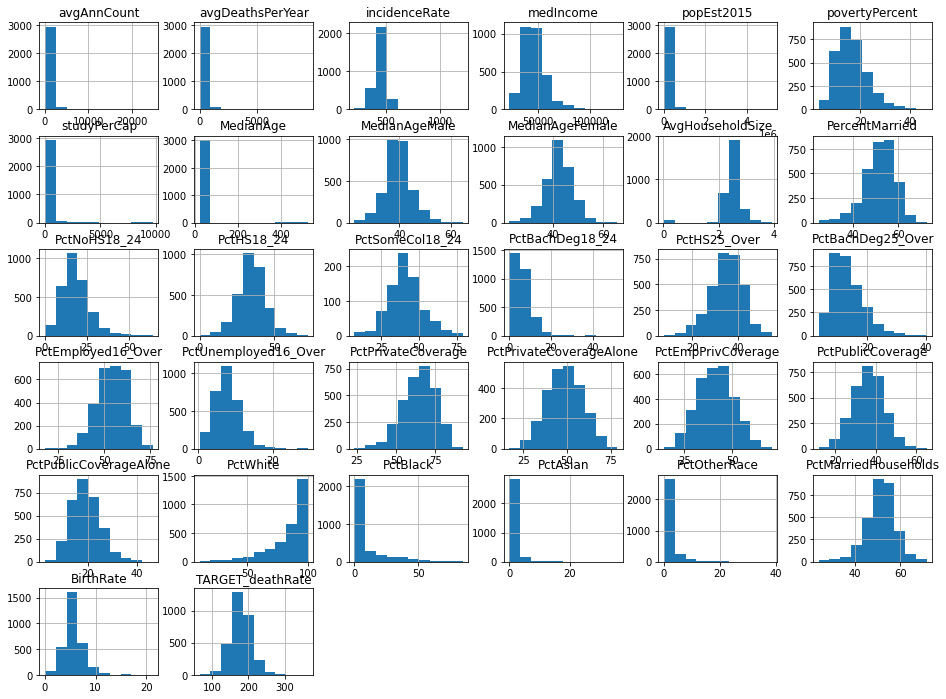

In [ ]:
cancer_data.hist(bins=10, figsize=(16,12))
plt.show()

In [ ]:
cancer_data.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.923935,0.093793,0.292551,0.907281,-0.153511,0.070595,-0.018056,-0.117826,-0.118879,0.056932,-0.092258,-0.149731,-0.177809,0.135715,0.293842,-0.314156,0.337281,0.211518,-0.017797,0.151717,0.223735,0.217377,-0.184398,-0.110135,-0.134860,0.033512,0.440741,0.207671,-0.095842,-0.028986,-0.130745
avgDeathsPerYear,0.923935,1.000000,0.083217,0.244401,0.971384,-0.078702,0.064497,-0.016642,-0.149103,-0.146657,0.081113,-0.181102,-0.140910,-0.145693,0.124088,0.266891,-0.301554,0.309534,0.129842,0.071778,0.069847,0.156071,0.176008,-0.143982,-0.041234,-0.190650,0.092127,0.456169,0.213360,-0.161171,-0.070212,-0.074008
incidenceRate,0.093793,0.083217,1.000000,-0.006377,0.046802,0.018940,0.064139,0.015603,-0.001209,0.004629,-0.085617,-0.122265,-0.179984,0.065147,0.015150,0.031113,0.138648,-0.053213,0.009715,0.105996,0.096089,0.099161,0.149924,0.065979,0.062519,-0.031335,0.118791,0.002370,-0.204575,-0.155923,-0.113258,0.467683
medIncome,0.292551,0.244401,-0.006377,1.000000,0.269641,-0.793994,0.041672,0.000035,-0.089085,-0.150649,0.108409,0.365952,-0.288185,-0.192084,0.209746,0.495539,-0.466977,0.709065,0.694584,-0.458752,0.729902,0.788437,0.746149,-0.753168,-0.723002,0.174797,-0.268332,0.450907,0.087813,0.448764,-0.005879,-0.433311
popEst2015,0.907281,0.971384,0.046802,0.269641,1.000000,-0.083109,0.059083,-0.013029,-0.187828,-0.191556,0.108130,-0.162652,-0.136246,-0.154262,0.108005,0.267584,-0.333157,0.330253,0.154495,0.048604,0.073981,0.171036,0.186544,-0.186896,-0.064535,-0.201226,0.086081,0.499890,0.244680,-0.128920,-0.054911,-0.111470
povertyPercent,-0.153511,-0.078702,0.018940,-0.793994,-0.083109,1.000000,-0.052453,-0.039496,-0.207178,-0.140043,0.065956,-0.644720,0.269000,0.089684,-0.172495,-0.387056,0.191345,-0.528803,-0.732775,0.654213,-0.819489,-0.757670,-0.677633,0.649896,0.797798,-0.508448,0.514195,-0.163345,0.038812,-0.606798,-0.037040,0.427118
studyPerCap,0.070595,0.064497,0.064139,0.041672,0.059083,-0.052453,1.000000,-0.027554,-0.040006,-0.036666,0.001118,-0.037337,-0.060354,-0.059989,0.139199,0.050189,-0.089984,0.114052,0.090686,-0.037289,0.095512,0.070741,0.092621,-0.060247,-0.067500,0.017619,-0.014936,0.065682,-0.024420,-0.045476,0.008558,-0.023890
MedianAge,-0.018056,-0.016642,0.015603,0.000035,-0.013029,-0.039496,-0.027554,1.000000,0.107618,0.113412,-0.025631,0.060273,0.005996,0.038764,-0.015009,-0.013868,0.050811,-0.018384,-0.014811,0.003946,0.021894,-0.011277,-0.016232,0.027074,-0.021316,0.029777,-0.005716,-0.024078,-0.028023,0.031896,0.000633,0.002772
MedianAgeMale,-0.117826,-0.149103,-0.001209,-0.089085,-0.187828,-0.207178,-0.040006,0.107618,1.000000,0.929571,-0.332021,0.444570,0.106684,0.250098,-0.243584,-0.042250,0.320815,-0.147587,-0.187813,-0.115568,0.068686,-0.174799,-0.232712,0.402511,0.010843,0.380859,-0.240541,-0.245138,-0.274713,0.216806,-0.086324,-0.002006
MedianAgeFemale,-0.118879,-0.146657,0.004629,-0.150649,-0.191556,-0.140043,-0.036666,0.113412,0.929571,1.000000,-0.356711,0.359423,0.157249,0.259973,-0.305402,-0.087830,0.354246,-0.199957,-0.278066,-0.089276,0.028907,-0.224679,-0.281330,0.463691,0.056223,0.314168,-0.158247,-0.264226,-0.279382,0.148140,-0.079924,0.034693


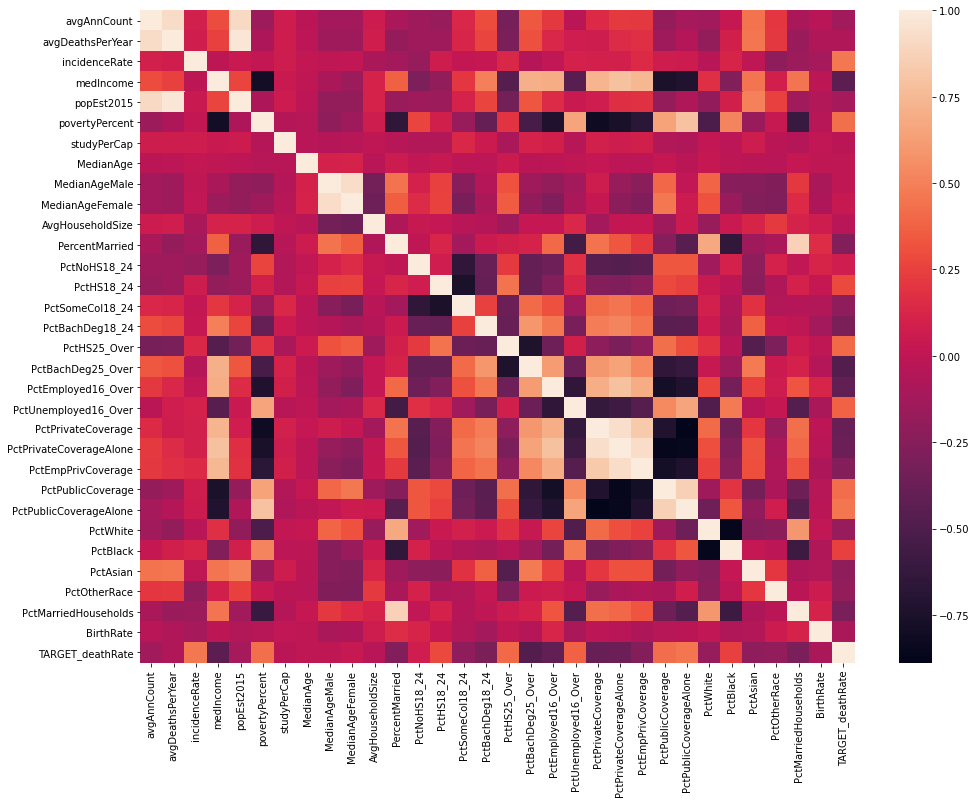

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(cancer_data.corr())

We will drop binnedInc and Geography because we do not know enough to separate the object into useful numbers.

In [ ]:
cancer_data=cancer_data.drop(['binnedInc', 'Geography'], axis=1)

### Separate the Input and Target Features of the data

Input features: independent variables

Target feature: dependent variable, TARGET_deathRate

In [ ]:
X = cancer_data.drop('TARGET_deathRate', axis  = 1)
y = cancer_data['TARGET_deathRate']

### Split the data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Task 2

### Perform Data Preparation Steps

Check for missing values

In [ ]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

### Replace missing values

PctSomeCol18_24 

In [ ]:
cancer_data['PctSomeCol18_24'].describe()

count    3051.000000
mean       41.247898
std         5.631254
min         7.100000
25%        41.247898
50%        41.247898
75%        41.247898
max        79.000000
Name: PctSomeCol18_24, dtype: float64

Since PctSomeColl18_24 are floats and its histogram is somewhat normally distributed, we will replace the missing values with the mean.

In [ ]:
cancer_data['PctSomeCol18_24']=cancer_data['PctSomeCol18_24'].fillna(cancer_data['PctSomeCol18_24'].mean())

PctEmployed16_Over          


In [ ]:
cancer_data['PctEmployed16_Over'].describe()

count    3051.000000
mean       54.115626
std         8.059009
min        17.600000
25%        48.900000
50%        54.115626
75%        60.050000
max        76.500000
Name: PctEmployed16_Over, dtype: float64

Since PctEmployed16_Over are floats, we will replace the missing values with the mean.



In [ ]:
cancer_data['PctEmployed16_Over']=cancer_data['PctEmployed16_Over'].fillna(cancer_data['PctEmployed16_Over'].mean())

PctPrivateCoverageAlone 

In [ ]:
cancer_data['PctPrivateCoverageAlone'].describe()

count    3051.000000
mean       48.573314
std         8.965308
min        16.800000
25%        43.200000
50%        48.573314
75%        53.900000
max        78.900000
Name: PctPrivateCoverageAlone, dtype: float64

Since PctPrivateCoverageAlone are floats, we will replace the missing values with the mean.

In [ ]:
cancer_data['PctPrivateCoverageAlone']=cancer_data['PctPrivateCoverageAlone'].fillna(cancer_data['PctPrivateCoverageAlone'].mean())

In [ ]:
cancer_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

The data no longer has missing values.

Split independent and dependent variables and build test/train seets again after filling missing values

In [ ]:
X = cancer_data.drop('TARGET_deathRate', axis  = 1)
y = cancer_data['TARGET_deathRate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Task 3

### Build any Machine Learning Model of your choice

LINEAR REGRESSION

In [ ]:
linModel = LinearRegression()   
linModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate your model with various Evaluation Metrics

In [ ]:
# Model evaluation for training set
test_target_pred = linModel.predict(X_train)
mse = mean_squared_error(y_train, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_train, test_target_pred)))
r2 = r2_score(y_train, test_target_pred)
print('MSE for train is {}'.format(mse))
print('RMSE for train is {}'.format(rmse))
print('R2 score for train is {}'.format(r2))

MSE for train is 357.94276526576795
RMSE for train is 18.919375393119296
R2 score for train is 0.523102648825607


In [ ]:
# Model evaluation for testing set
test_target_pred = linModel.predict(X_test)
mse = mean_squared_error(y_test, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)
print('MSE for test is {}'.format(mse))
print('RMSE for test is {}'.format(rmse))
print('R2 score for test is {}'.format(r2))

MSE for test is 336.62093663041856
RMSE for test is 18.347232397024314
R2 score for test is 0.5774864987983328


### Try out other Machine Learning Models and Evaluate them


RANDOM FOREST REGRESSOR

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Model evaluation for training set
test_target_pred = forest.predict(X_train)
mse = mean_squared_error(y_train, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_train, test_target_pred)))
r2 = r2_score(y_train, test_target_pred)
print('MSE for train is {}'.format(mse))
print('RMSE for train is {}'.format(rmse))
print('R2 score for train is {}'.format(r2))

MSE for train is 31.74642047295075
RMSE for train is 5.634396194176511
R2 score for train is 0.9577033389078904


In [ ]:
# Model evaluation for testing set
test_target_pred = forest.predict(X_test)
mse = mean_squared_error(y_test, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)
print('MSE for test is {}'.format(mse))
print('RMSE for test is {}'.format(rmse))
print('R2 score for test is {}'.format(r2))

MSE for test is 200.91803975941062
RMSE for test is 14.174556069218204
R2 score for test is 0.7478154945349491


### Try out other Machine Learning Models and Evaluate them




DECISION TREE REGRESSOR

In [ ]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Evaluate your model with various Evaluation Metrics

In [ ]:
# Model evaluation for training set
test_target_pred = tree.predict(X_train)
mse = mean_squared_error(y_train, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_train, test_target_pred)))
r2 = r2_score(y_train, test_target_pred)
print('MSE for train is {}'.format(mse))
print('RMSE for train is {}'.format(rmse))
print('R2 score for train is {}'.format(r2))

MSE for train is 342.5262000114853
RMSE for train is 18.50746335972289
R2 score for train is 0.5436425782428582


In [ ]:
# Model evaluation for testing set
test_target_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, test_target_pred)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

MSE is 399.59551547659225
RMSE is 19.989885329250697
R2 score is 0.4984432578717882


The mean square error (MSE) and root mean square error (RMSE) is smaller in our random forest model than either our linear regression model or our decision tree regressor model for both testing and training data. Our random forest model also has a higher correlation, a higer R2 score than our linear regression or decision tree regressor models. However, the RMSE and R2 scores for training and testing data were closer together in the linear regression model and decision tree model than in the random forest model, meaning that our random forest model may have overfitted to the training data. 

## Task 4

### Perform Hyperparameter Tuning

GridSearchCV

In [ ]:
RandomForestRegressor().get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# Function from Day 9: Hyperparameter Tuning and Model Evaluation notebook
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestRegressor()
parameters = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [4, 6],
    'n_estimators': [100, 200],
}
cv = GridSearchCV(RF, parameters, cv=5, n_jobs=-1, verbose=2)
cv.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
cv.best_score_

0.6400051264847617

In [ ]:
print(cv.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


### Evaluate your model 

In [ ]:
rForest2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)   
rForest2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Model evaluation for testing set
pred = rForest2.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('MSE for test is {}'.format(mse))
print('RMSE for test is {}'.format(rmse))
print('R2 score for test is {}'.format(r2))

MSE for test is 216.80517395951892
RMSE for test is 14.72430555101051
R2 score for test is 0.7278745818806709


The scores got a little worse after hyperparameter tuning.

## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

BORUTA

In [ ]:
!pip install Boruta
from boruta import BorutaPy

     |████████████████████████████████| 61kB 4.7MB/s 


In [ ]:
RFR = RandomForestRegressor(random_state=1)
boruta_selector = BorutaPy(RFR, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	13
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	13
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	13
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	13
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=73, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7FD1A6287888,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
# Model evaluation for train set
pred = rf_important.predict(X_important_train)
mse = mean_squared_error(y_train, pred)
rmse = (np.sqrt(mean_squared_error(y_train, pred)))
r2 = r2_score(y_train, pred)
print('MSE for test is {}'.format(mse))
print('RMSE for test is {}'.format(rmse))
print('R2 score for test is {}'.format(r2))

MSE for test is 30.91873036865992
RMSE for test is 5.5604613449479094
R2 score for test is 0.9588060940314266


In [ ]:
# Model evaluation for test set
pred = rf_important.predict(X_important_test)
mse = mean_squared_error(y_test, pred)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('MSE for test is {}'.format(mse))
print('RMSE for test is {}'.format(rmse))
print('R2 score for test is {}'.format(r2))

MSE for test is 198.76580369489446
RMSE for test is 14.098432668027126
R2 score for test is 0.7505168974961962


In [ ]:
print("No. of significant features: ", boruta_selector.n_features_)

No. of significant features:  24


The Boruta feature selection found 24 significant features. Using these features, our Random Forest Model gives us the best MSE, RMSE, and R2 scores so far. 

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, download this notebook and submit it on the platform: https://dphi.tech/practice/challenge/52#notebooks 


## Task 6

### Load test data and display first 5 rows

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [ ]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

Remove non-numerical variables

In [ ]:
test_data=test_data.drop(['binnedInc', 'Geography'], axis=1)

Fill missing values

In [ ]:
test_data['PctSomeCol18_24']=test_data['PctSomeCol18_24'].fillna(test_data['PctSomeCol18_24'].mean())
test_data['PctEmployed16_Over']=test_data['PctEmployed16_Over'].fillna(test_data['PctEmployed16_Over'].mean())
test_data['PctPrivateCoverageAlone']=test_data['PctPrivateCoverageAlone'].fillna(test_data['PctPrivateCoverageAlone'].mean())

In [ ]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   MedianAge                762 non-null    float64
 8   MedianAgeMale            762 non-null    float64
 9   MedianAgeFemale          762 non-null    float64
 10  AvgHouseholdSize         762 non-null    float64
 11  PercentMarried           762 non-null    float64
 12  PctNoHS18_24             762 non-null    float64
 13  PctHS18_24               762 non-null    float64
 14  PctSomeCol18_24          7

In [ ]:
cancer_data.duplicated().sum()

0

No duplicates to remove.

### Run model with test data

Use Boruta model because it gave us the best results.

In [ ]:
X_important = boruta_selector.transform(np.array(X))

In [ ]:
RForest = RandomForestRegressor()   
RForest.fit(X_important,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
target = RForest.predict(boruta_selector.transform(np.array(test_data)))

### Save prediction file

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
#res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
# res.to_csv('prediction_results.csv', inplace = False)
res.to_csv('prediction_results2.csv')         
files.download('prediction_results2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>